In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
def readDataframe(angles):
  # angles = [45,63,72]
  dfs = []
  for angle in angles:
    dfs.append( pd.read_excel('resultados_'+str(int(angle))+'g.xlsx', sheet_name=['dados_radial',"dados_wall", "dados_axis", "dados_wall_tail", 'vorticidade','turbulencia']))
  return dfs

In [3]:
angles = [45,63,72]
dfs = readDataframe(angles)

In [234]:
df_45 = pd.read_excel('resultados_45g.xlsx', sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
df_63 = pd.read_excel('resultados_63g.xlsx',  sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
df_72 = pd.read_excel('resultados_72g.xlsx',  sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])

## Velocity Axial and Tangencial 

In [204]:
def plotVel(direction, distances):
    plt.figure(figsize=(12, 10))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_45['dados_radial']['vel_' + direction  + '_' + str(int(d))+'d' ].div(Ub), label=str(int(d))+'D - 45º')
       plt.scatter(df_63['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_63['dados_radial']['vel_' + direction  + '_' + str(int(d))+'d' ].div(Ub), label=str(int(d))+'D - 63º')
       plt.scatter(df_72['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_72['dados_radial']['vel_' + direction  + '_' + str(int(d))+'d' ].div(Ub), label=str(int(d))+'D - 72º')

       plt.xlabel("r/R")
       if direction == 'tang':
           plt.ylabel("v/Ub")
       elif direction == 'axial':
           plt.ylabel("u/Ub")
       plt.grid(True)
       plt.legend(loc="best")   
       plt.show;
    
    

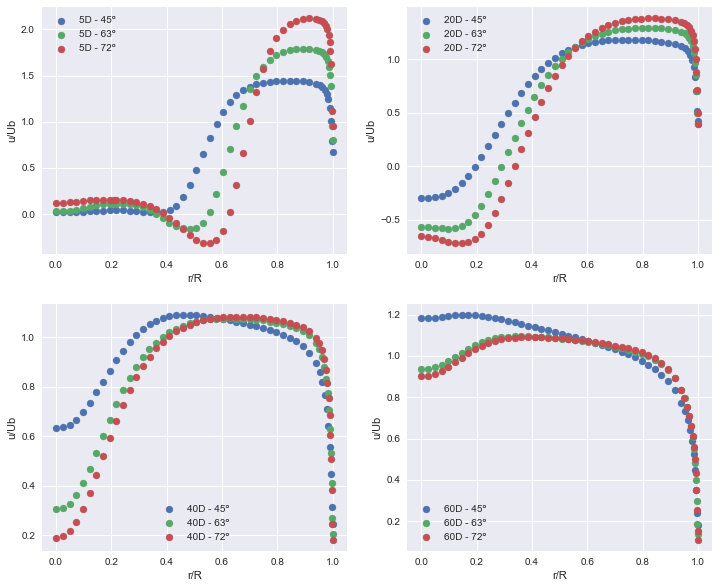

In [206]:
Ub = 1 #vel bulk
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotVel('axial', distances)
plt.savefig('graficos_v2/velaxial_radial.png')

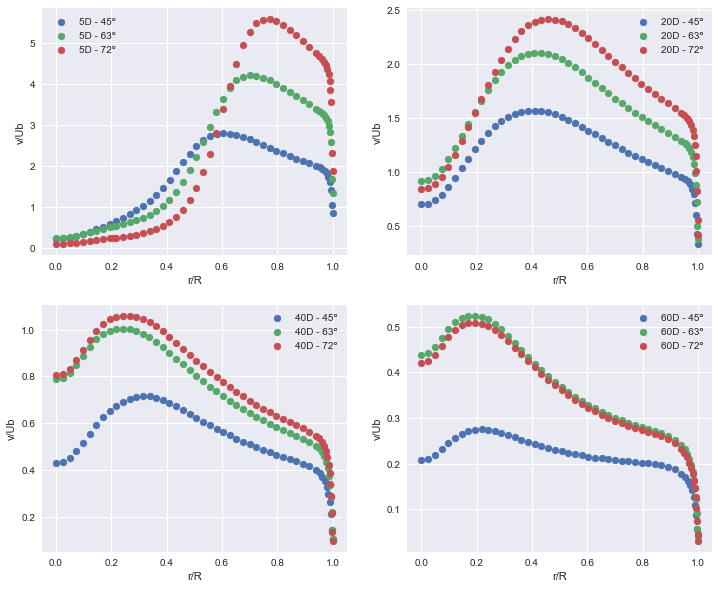

In [172]:
plotVel('tang', distances)
plt.savefig('graficos_v2/velaxial_radial.png')

## Swirl number

In [183]:
def plotS(df, distances, angle):
  Sss = []
  for d in distances:
    Sss.append ( (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_' + str(int(d)) + 'd']*df['dados_radial']['r_'+ str(int(d)) +'d']*df['dados_radial']['vel_tang_'+ str(int(d)) +'d']*df['dados_radial']['r_'+ str(int(d)) +'d']), df['dados_radial']['r_'+ str(int(d)) +'d'])))/(np.pi*(R**3)*(Ub**2)))
  S_tot = Sss #S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, S_tot,marker='o', label=angle)
  plt.xlabel("x/D")
  plt.ylabel("S")
  plt.grid(True)
  plt.legend(loc="best")
  #plt.savefig('graficos/intensidade_giro.png')
  plt.show;

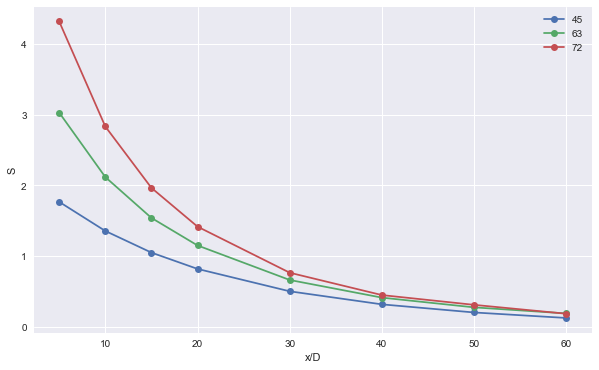

In [184]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 1
plt.figure(figsize=(10, 6))
for df, angle in zip(dfs, angles):
  plotS(df, distances, angle)

## Min. axial velocity

In [202]:
def plotVelaxialmin(df, distances, angle):
  vtm = []
  for d in distances:
   vtm.append (df['dados_radial']['vel_axial_' + str(int(d)) + 'd'].min())
  a = vtm
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, vtm,marker='o', label=str(int(angle))+'º')
  plt.xlabel("x/D")
  plt.ylabel("u min [m/s]")
  plt.grid(True)
  plt.legend(loc="best")
  #plt.savefig('graficos/velaxialmin_axis.png')
  plt.show;

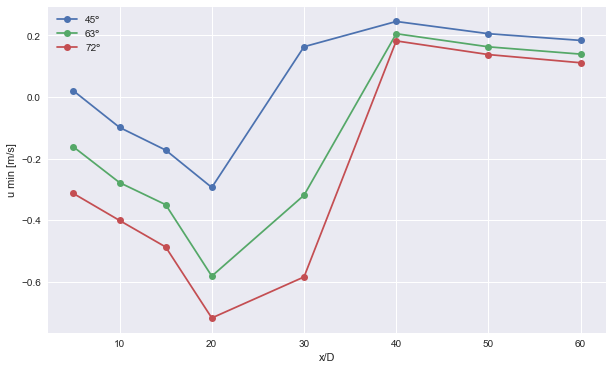

In [224]:
plt.figure(figsize=(10, 6))
distances = [5,10,15,20,30,40,50,60]
for df, angle in zip(dfs, angles):
  plotVelaxialmin(df, distances, angle)
plt.savefig('graficos_v2/velaxialmin_axis.png')

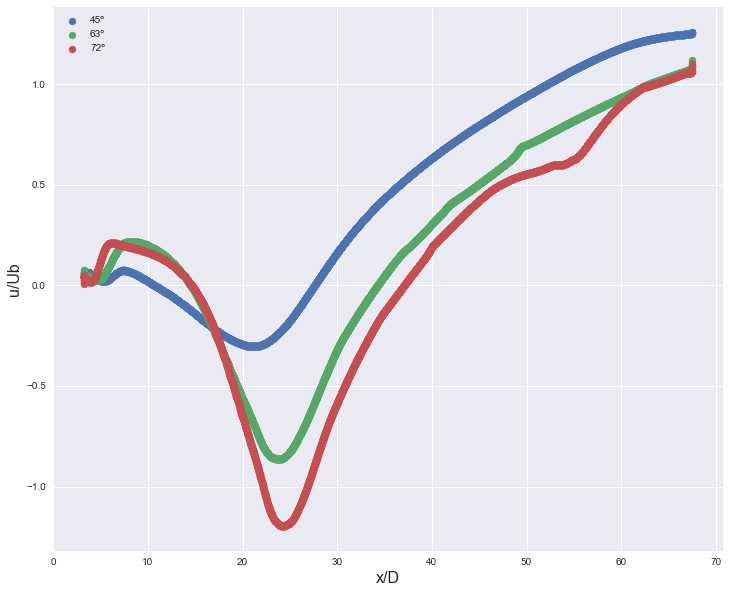

In [229]:
plt.figure(figsize=(12, 10))
D=0.05
Ub=1
plt.scatter(df_45['dados_axis']['x_axis'].div(D), df_45['dados_axis']['vel_mean_axial_axis_45g'].div(Ub), label='45º')
plt.scatter(df_63['dados_axis']['x_axis'].div(D), df_63['dados_axis']['vel_mean_axial_axis_63g'].div(Ub), label='63º')
plt.scatter(df_72['dados_axis']['x_axis'].div(D), df_72['dados_axis']['vel_mean_axial_axis_72g'].div(Ub), label='72º')

plt.xlabel("x/D", fontdict={'size': 16})
plt.ylabel("u/Ub", fontdict={'size': 16})
plt.grid(True)
plt.legend(loc="best")   
plt.show;
plt.savefig('graficos_v2/velaxial_axis.png')

## Calculating the displacement of the max. tangential velocity in the radius

In [258]:
def velmax(df, distances, direction):
  plt.figure(figsize=(12, 10))
  plt.subplot(3,1,i)
  for d in distances: 
    plt.scatter((df['dados_radial']['r_'+str(int(d))+'d'][df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'] == df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'].max() ].div(R)), df['dados_radial']['vel_'+direction+'_' + str(int(d)) + 'd'].max(), label=str(int(d))+'D')

  plt.xlabel("r/R", fontdict={'size': 16})
  if direction == 'tang':
    plt.ylabel("vmax", fontdict={'size': 16})
  elif direction == 'axial':
    plt.ylabel("umax", fontdict={'size': 16})
  plt.grid(True)
  plt.legend(loc="best")
  plt.show; 


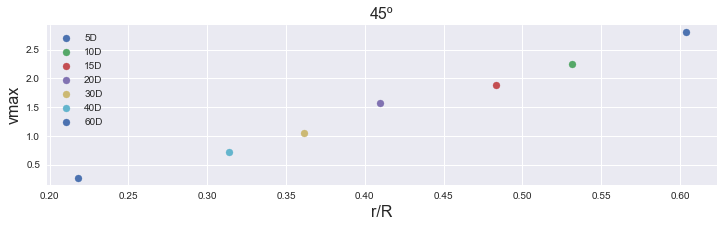

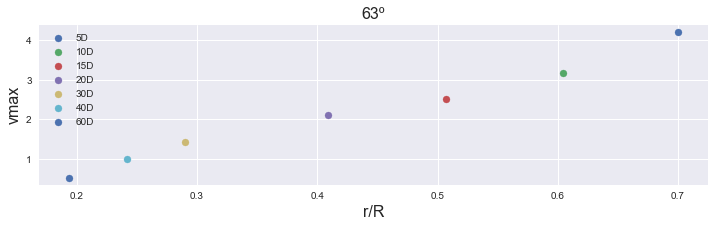

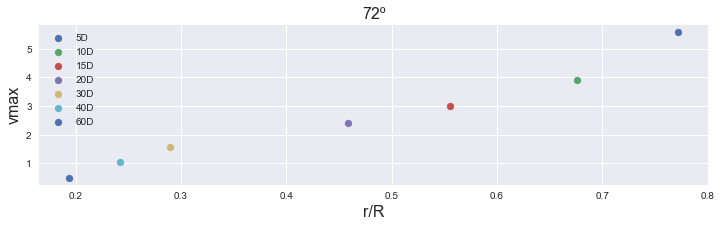

In [264]:
plot=[1,2,3]
distances = [5,10,15,20,30,40,60]
def velmax2(dfs, plot, angles):
    for (df,i,g) in zip(dfs, plot,angles):
        velmax(df, distances, 'tang')
        plt.title(''+ str(g) +'º',  fontdict={'size': 16})
        
velmax2(dfs, plot, angles)
plt.savefig('graficos_v2/veltang2_axis.png')

##  Axial vorticity

In [167]:
def plotvortcompaxial(df, distances, direction):
  plt.figure(figsize=(12, 10))
  plt.subplot(3,1,i)
  for d in distances:
    vel_tang = df['dados_radial']['vel_tang_'+str(int(d))+'d']
    r_d = df['dados_radial']['r_'+str(int(d))+'d']
    w_x=((1/r_d[:-1])*(vel_tang+(r_d[:-1]*np.diff(vel_tang)/np.diff(r_d))))
    plt.scatter(r_d,w_x,label=str(int(d))+'D')
    
  plt.xlabel("r/R")
  plt.ylabel("Axial vorticity [1/s]")
  plt.grid(True)
  plt.legend(loc="best")   
  plt.show;

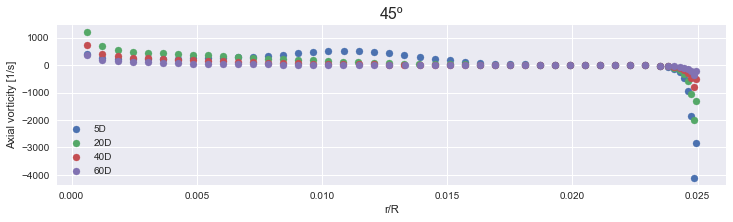

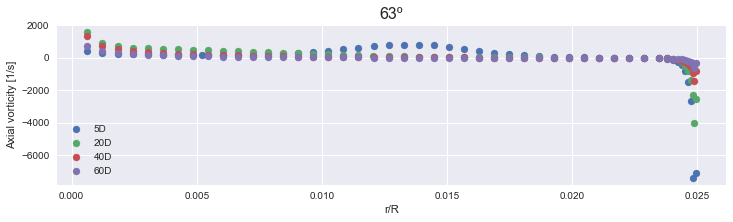

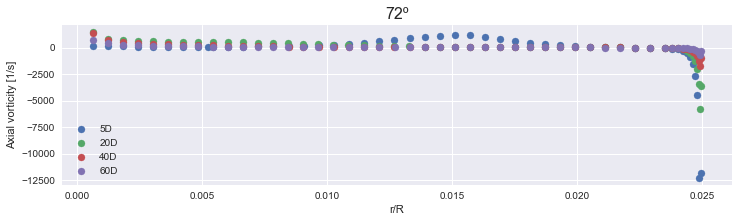

In [168]:
distances = [5,20,40,60]
R = 0.025
Ub = 1
for (df,i,g) in zip(dfs, plot,angles):
  plotvortcompaxial(df, distances, 'axial')
  plt.title(''+ str(g) +'º',  fontdict={'size': 16})
  #plt.savefig('graficos/vorticidade_axial_' + str(angle) + 'g.png')

## Turbulent intensity

In [160]:
def plotTurbInt(distances,plot):
    plt.figure(figsize=(12, 10))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_45['turbulencia']['turb_int_' +str(int(d))+'d'], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_63['turbulencia']['turb_int_' +str(int(d))+'d'], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_72['turbulencia']['turb_int_' +str(int(d))+'d'], label=str(int(d))+'D - 72º')

       plt.xlabel("r/R")
       plt.ylabel("Turbulent intensity")
       plt.grid(True)
       plt.legend(loc="best")   
       plt.show;

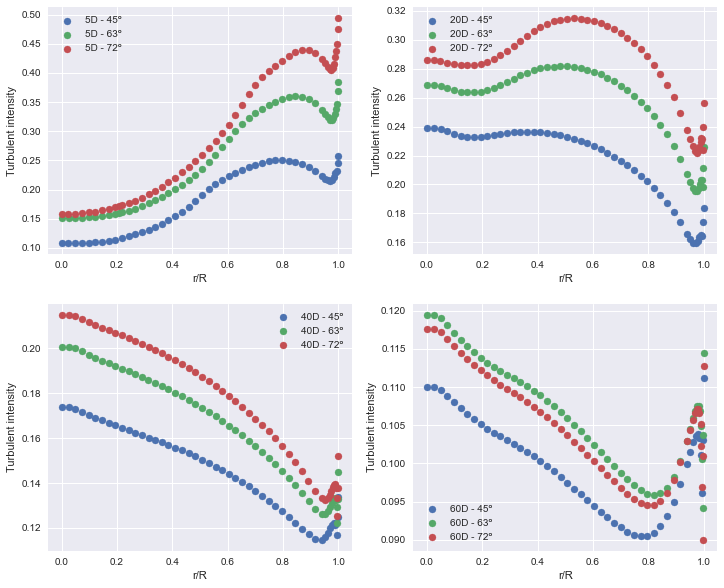

In [161]:
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotTurbInt(distances,plot)


## UV Reynolds Stress

In [162]:
def plotUV(distances,plot):
    plt.figure(figsize=(12, 10))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_45['turbulencia']['uv_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_63['turbulencia']['uv_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_72['turbulencia']['uv_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 72º')

       plt.xlabel("r/R")
       plt.ylabel("uv")
       plt.grid(True)
       plt.legend(loc="best")   
       plt.show;

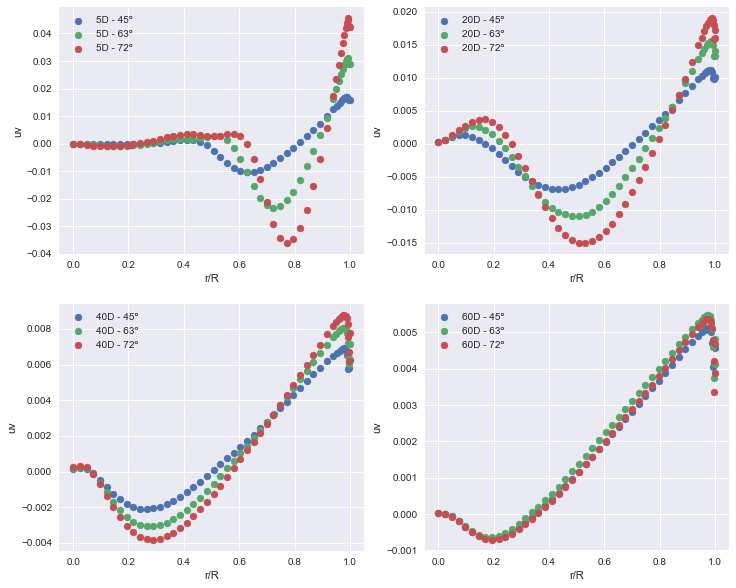

In [163]:
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotUV(distances,plot)

## UW Reynolds Stress

In [158]:
def plotUW(distances,plot):
    plt.figure(figsize=(12, 10))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_45['turbulencia']['uw_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_63['turbulencia']['uw_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_72['turbulencia']['uw_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 72º')

       plt.xlabel("r/R")
       plt.ylabel("uv")
       plt.grid(True)
       plt.legend(loc="best")   
       plt.show;

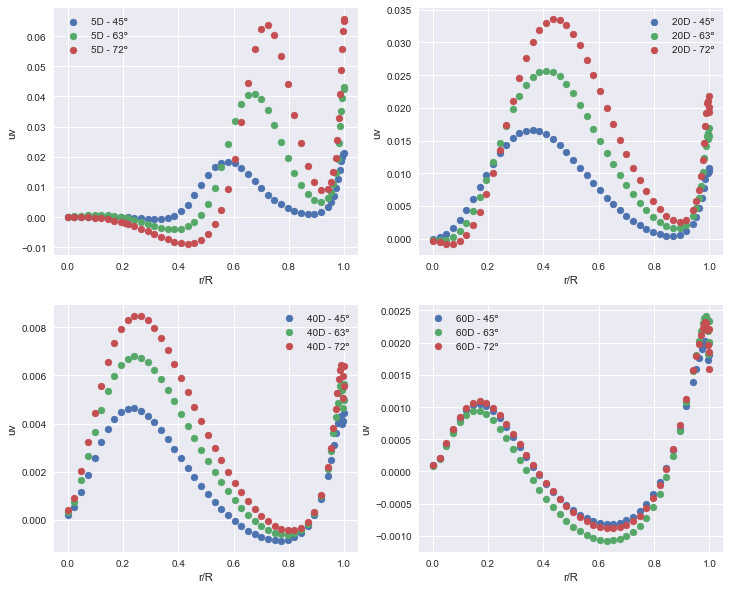

In [159]:
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotUW(distances,plot)

## Axial velocity statistics at the centerline of the flow

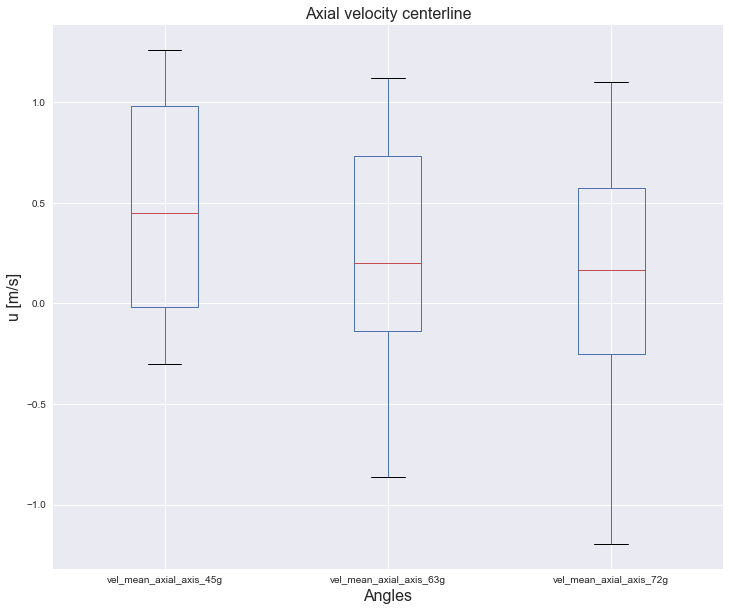

In [216]:
plt.figure(figsize=(12, 10))
df = pd.read_excel('resultados_45g.xlsx', sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
num=df['dados_axis']
num.boxplot(column=['vel_mean_axial_axis_45g','vel_mean_axial_axis_63g','vel_mean_axial_axis_72g']);
plt.xlabel("Angles", fontdict={'size': 16})
plt.ylabel("u [m/s]", fontdict={'size': 16})
plt.title('Axial velocity centerline', fontdict={'size': 16})
plt.show;
plt.savefig('graficos_v2/velaxial_boxplot.png')

In [ ]:
Data 

In [191]:
df_45['dados_axis']['vel_mean_axial_axis_45g'].describe()

count    4772.000000
mean        0.461165
std         0.532898
min        -0.303202
25%        -0.015118
50%         0.449531
75%         0.982780
max         1.261370
Name: vel_mean_axial_axis_45g, dtype: float64

In [192]:
df_45['dados_axis']['vel_mean_axial_axis_63g'].describe()

count    4774.000000
mean        0.224464
std         0.557221
min        -0.862936
25%        -0.136334
50%         0.203814
75%         0.733376
max         1.123460
Name: vel_mean_axial_axis_63g, dtype: float64

In [193]:
df_45['dados_axis']['vel_mean_axial_axis_72g'].describe()

count    4775.000000
mean        0.113595
std         0.613655
min        -1.196890
25%        -0.250603
50%         0.168732
75%         0.573759
max         1.099750
Name: vel_mean_axial_axis_72g, dtype: float64

In [247]:
df1 = df_45['dados_axis'] ##.loc[df_45['vel_mean_axial_axis_45g']==-0.303202]
df1.loc[df1['vel_mean_axial_axis_45g']==-0.303202]

,x_axis,pressao_estatica_axis,pressao_total_axis,vel_mean_axial_axis_45g,vel_mean_axial_axis_63g,vel_mean_axial_axis_72g,Unnamed: 6,Unnamed: 7
1330,1.05403,-5767.38,-4118.93,-0.303202,-0.67753,-0.814611,NaN,NaN


In [248]:
df2 = df_63['dados_axis']
df2.loc[df2['vel_mean_axial_axis_63g']==-0.862936]

,x_axis,pressao_estatica_axis,pressao_total_axis,vel_mean_axial_axis_63g,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1540,1.19494,-7938.05,-5426.53,-0.862936,NaN,NaN,NaN,NaN


In [249]:
df3 = df_72['dados_axis']
df3.loc[df3['vel_mean_axial_axis_72g']==-1.196890]

,x_axis,pressao_estatica_axis,pressao_total_axis,vel_mean_axial_axis_72g,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1568,1.21323,-9697.6,-6578.85,-1.19689,NaN,NaN,NaN,NaN
